In [142]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Position confined to some 1D path: $x=x(\theta)$ and $y=y(\theta)$

A few examples
   
Parabola: $x =\theta$ and $y=\theta^2$

Simple Pendulum: $x = \cos(\theta)$ and $y=\sin(\theta)$

Tautochrone: $x = \sin(2\theta) + 2\theta$ and $y=1-\cos(2 \theta)$

Many more ...

Kinetic Energy: $ T = \frac{1}{2}m (\dot{x}^2 + \dot{y}^2) $

Potential Energy: $ V = mgy $

The Lagrangian: $L = T- V $

Lagranges Equation: $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}} = 0$

In [143]:
t, m, g = smp.symbols('t m g')
theta = smp.symbols(r'\theta', cls=smp.Function)
theta = theta(t)
theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta_d, t)

In [144]:
theta_dd

Derivative(\theta(t), (t, 2))

In [145]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(theta)
y = y(theta)

In [146]:
# Define x and y
path = 'parab'
if path == 'parab':
    x = theta
    y = theta**2
    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)


In [147]:
T = 1/2*m*(smp.diff(x,t)**2+smp.diff(y,t)**2)
V = m*g*y
L = T-V

In [148]:
LE = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)
LE = LE.simplify()
LE

-m*(2*g*\theta(t) + 4.0*\theta(t)**2*Derivative(\theta(t), (t, 2)) + 4.0*\theta(t)*Derivative(\theta(t), t)**2 + 1.0*Derivative(\theta(t), (t, 2)))

In [149]:
deriv_2 = smp.solve(LE, theta_dd)[0]
deriv_1 = theta_d

In [150]:
deriv2_f = smp.lambdify((g, theta, theta_d), deriv_2)
deriv1_f = smp.lambdify(theta_d, theta_d)


$S = (\theta, \omega)$

In [151]:
def dSdt(S, t):
    return [
        deriv1_f(S[1]), #dtheta/dt
        deriv2_f(g, S[0], S[1]), #domega/dt
    ]

In [152]:
t = np.linspace(0,20,1000)
g = 9.81
ans = odeint(dSdt, y0=[2,0], t=t)
ans_2 = odeint(dSdt, y0=[3,0], t=t)

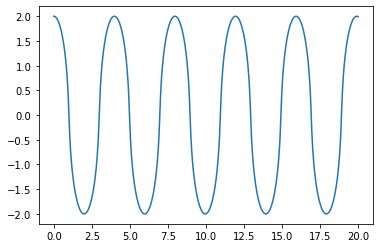

In [153]:
plt.plot(t, ans.T[0])

In [154]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [155]:
x1, y1 = get_xy(ans.T[0])
x2, y2 = get_xy(ans_2.T[0])

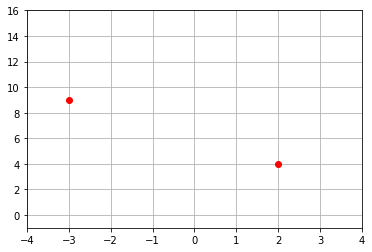

In [156]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])


fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([],[],'ro')
ln2, = plt.plot([],[],'ro')
ax.set_ylim(-1,16)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval = 50)
ani.save('pen.gif', writer='pillow', fps = 50)
